In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import random
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
import numpy as np
from tensorflow.keras.regularizers import l2
from PIL import Image
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
from tensorflow.keras.backend import learning_phase_scope
import matplotlib.pyplot as plt

In [2]:
%load_ext jupyter_ai

In [3]:
#Reading and splitting the images in train,validation and test
animals_path = "C:\\Users\\USUARIO\\animals"
animals_train_path = "C:\\Users\\USUARIO\\animals_train"
animals_test_path = "C:\\Users\\USUARIO\\animals_test"
animals_valid_path = "C:\\Users\\USUARIO\\animals_valid"
subcategories = ["cats","dogs","panda"]
train_ratio = 0.8
for subcategory in subcategories:
    subcategory_folder = os.path.join(animals_path,subcategory)
    image_files = sorted(os.listdir(subcategory_folder))
    num = int(len(image_files) * train_ratio)
    test_num = int(len(image_files) - num)
    train_subfolder = os.path.join(animals_train_path, subcategory)
    test_subfolder = os.path.join(animals_test_path, subcategory)
    valid_subfolder = os.path.join(animals_valid_path,subcategory)
    os.makedirs(train_subfolder, exist_ok=True)
    os.makedirs(test_subfolder, exist_ok=True)
    os.makedirs(valid_subfolder,exist_ok=True)
    for index,i in enumerate(image_files):
        source_path = os.path.join(subcategory_folder,i)
        if index < num:
            if index  < int(num*train_ratio):
                destination_path = os.path.join(train_subfolder,i)
            else:
                destination_path = os.path.join(valid_subfolder,i)
        else:
            destination_path = os.path.join(test_subfolder,i)
        shutil.copyfile(source_path,destination_path)
print("Done")

Done


In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
data_train = train_datagen.flow_from_directory(
    directory=animals_train_path,
    target_size=(224,224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 1920 images belonging to 3 classes.


In [5]:
valid_datagen = ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
data_valid= valid_datagen.flow_from_directory(
    directory=animals_valid_path,
    target_size=(224,224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 480 images belonging to 3 classes.


In [24]:
test_datagen = ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
data_test = test_datagen.flow_from_directory(
    directory=animals_test_path,
    target_size=(224,224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    seed=42
)


Found 600 images belonging to 3 classes.


In [7]:
full_datagen = ImageDataGenerator()
data_full = full_datagen.flow_from_directory(
    directory="C:\\Users\\USUARIO\\animals",
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 3000 images belonging to 3 classes.


In [76]:
#Convolutional Neural Network
def cnn():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=32,activation="relu",kernel_size=(3,3),input_shape=(224,224,3)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(filters=64,activation="relu",kernel_size=(3,3)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(filters=128,activation="relu",kernel_size=(3,3)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(filters=256,activation="relu",kernel_size=(3,3)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(filters=256,activation="relu",kernel_size=(3,3)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256,activation="relu"))
    model.add(keras.layers.Dense(64,activation="relu"))
    model.add(keras.layers.Dense(3,activation="softmax")) 
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model
def train_model(model,epochs):
    model.fit(data_train,validation_data=data_valid,epochs=epochs)
    return model
def evaluate_model(model):
    test_loss,test_acc = model.evaluate(data_test)
    return test_loss,test_acc
test_loss,test_acc= evaluate_model(train_model(cnn(),5))
print(f"Test accuracy was {(test_acc*100):.3f}%")

Epoch 1/5
60/60 [==============================] - 36s 580ms/step - loss: 0.9822 - accuracy: 0.4667 - val_loss: 0.9208 - val_accuracy: 0.5458
Epoch 2/5
60/60 [==============================] - 34s 558ms/step - loss: 0.8608 - accuracy: 0.5391 - val_loss: 0.8114 - val_accuracy: 0.5792
Epoch 3/5
60/60 [==============================] - 35s 574ms/step - loss: 0.8125 - accuracy: 0.5635 - val_loss: 0.7468 - val_accuracy: 0.5938
Epoch 4/5
60/60 [==============================] - 38s 629ms/step - loss: 0.7781 - accuracy: 0.5797 - val_loss: 0.7393 - val_accuracy: 0.5938
Epoch 5/5
19/19 [==============================] - 9s 481ms/step - loss: 0.7558 - accuracy: 0.6033
Test accuracy was 60.333%


Epoch 1/5
60/60 [==============================] - 38s 614ms/step - loss: 1.0764 - accuracy: 0.4672 - val_loss: 0.8777 - val_accuracy: 0.5208
Epoch 2/5
60/60 [==============================] - 37s 620ms/step - loss: 0.8580 - accuracy: 0.5516 - val_loss: 0.8308 - val_accuracy: 0.6000
Epoch 3/5
60/60 [==============================] - 34s 564ms/step - loss: 0.8220 - accuracy: 0.5781 - val_loss: 0.7836 - val_accuracy: 0.5875
Epoch 4/5
60/60 [==============================] - 33s 555ms/step - loss: 0.7810 - accuracy: 0.5875 - val_loss: 0.6999 - val_accuracy: 0.6104
Epoch 5/5
19/19 [==============================] - 9s 462ms/step
The accuracy of the transfer learning model was 60.167%


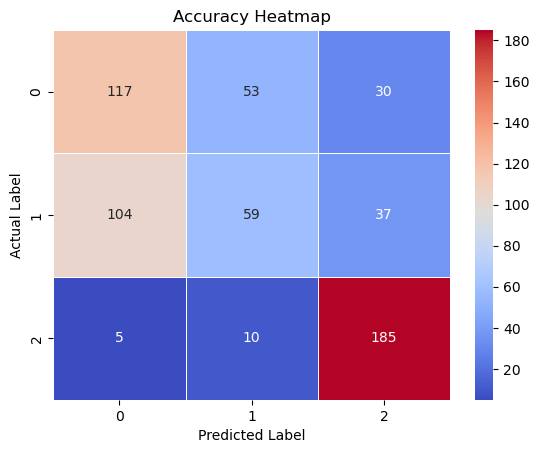

In [72]:
y_pred = train_model(cnn(),5).predict(data_test)
predicted_class_indices = y_pred.argmax(axis=1)
accuracy = accuracy_score(data_test.classes,predicted_class_indices)
matrix = confusion_matrix(data_test.classes,predicted_class_indices)
print(f"The accuracy of the transfer learning model was {(accuracy*100):.3f}%")
sns.heatmap(matrix,cmap="coolwarm",annot=True,fmt="d",linewidths=0.5)
plt.title("Accuracy Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [73]:
matrix

array([[117,  53,  30],
       [104,  59,  37],
       [  5,  10, 185]], dtype=int64)

In [25]:
#State-of-art convolutional neural network model VGG16 Transfer Learning
model_vgg16 = VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))
for layer in model_vgg16.layers:
    layer.trainable=False
model_transfer = keras.models.Sequential()
model_transfer.add(model_vgg16)
model_transfer.add(keras.layers.GlobalAveragePooling2D())
model_transfer.add(keras.layers.Dense(256,activation="relu"))
model_transfer.add(keras.layers.Dense(128,activation="relu"))
model_transfer.add(keras.layers.Dense(64,activation="relu"))
model_transfer.add(keras.layers.Dense(3,activation="softmax"))
model_transfer.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")
history  = model_transfer.fit(data_train,validation_data=data_valid,epochs=10)
test_loss,test_acc = model_transfer.evaluate(data_test)
print(f"Test accuracy was {(test_acc*100):.3f}%")

Epoch 1/10
60/60 [==============================] - 37s 566ms/step - loss: 0.9986 - accuracy: 0.5000 - val_loss: 0.7857 - val_accuracy: 0.6708
Epoch 2/10
60/60 [==============================] - 34s 561ms/step - loss: 0.5989 - accuracy: 0.7609 - val_loss: 0.4967 - val_accuracy: 0.8146
Epoch 3/10
60/60 [==============================] - 34s 564ms/step - loss: 0.3931 - accuracy: 0.8411 - val_loss: 0.4470 - val_accuracy: 0.8104
Epoch 4/10
60/60 [==============================] - 35s 586ms/step - loss: 0.3734 - accuracy: 0.8443 - val_loss: 0.3734 - val_accuracy: 0.8479
Epoch 5/10
60/60 [==============================] - 35s 589ms/step - loss: 0.3022 - accuracy: 0.8792 - val_loss: 0.3183 - val_accuracy: 0.8625
Epoch 6/10
60/60 [==============================] - 34s 563ms/step - loss: 0.3235 - accuracy: 0.8708 - val_loss: 0.3497 - val_accuracy: 0.8479
Epoch 7/10
60/60 [==============================] - 35s 591ms/step - loss: 0.2928 - accuracy: 0.8828 - val_loss: 0.3736 - val_accuracy: 0.8229

19/19 [==============================] - 8s 425ms/step
The accuracy of the transfer learning model was 87.333%


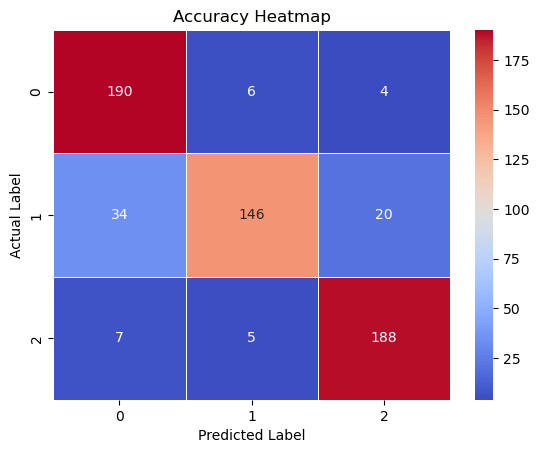

In [34]:
y_pred = model_transfer.predict(data_test)
predicted_class_indices = y_pred.argmax(axis=1)
accuracy = accuracy_score(data_test.classes,predicted_class_indices)
matrix = confusion_matrix(data_test.classes,predicted_class_indices)
print(f"The accuracy of the transfer learning model was {(accuracy*100):.3f}%")
sns.heatmap(matrix,cmap="coolwarm",annot=True,fmt="d",linewidths=0.5)
plt.title("Accuracy Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

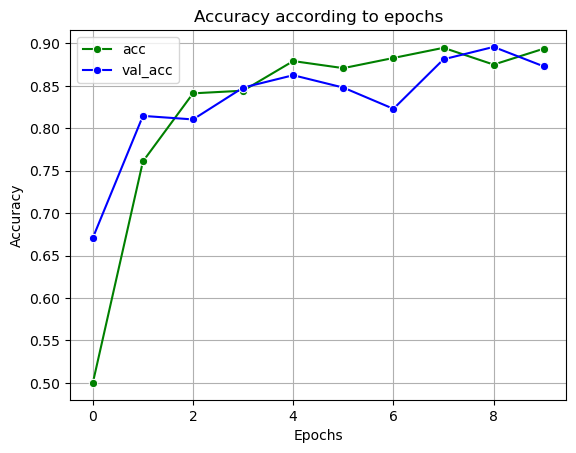

In [63]:
plt.title("Accuracy according to epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
acc = sns.lineplot(history.history["accuracy"],label="acc",marker="o",color="green")
val_acc = sns.lineplot(history.history["val_accuracy"],label="val_acc",marker="o",color="blue")
plt.legend()
plt.show()

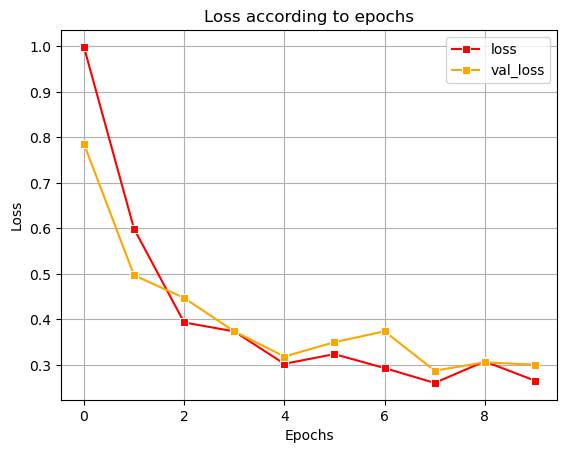

In [62]:
plt.title("Loss according to epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
acc = sns.lineplot(history.history["loss"],label="loss",marker="s",color="red")
val_acc = sns.lineplot(history.history["val_loss"],label="val_loss",marker="s",color="orange")
plt.legend()
plt.show()